In [112]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import random

# Load Dataset

In [113]:
# Find the current working directory and the datasets directory.
current_working_directory = os.getcwd()

dataset_directory = current_working_directory + "\DataSets"

In [114]:
# Load my csv data to a data frame.
bank_data_df = pd.read_csv(dataset_directory + '\\bank-full.csv', sep = ";")
bank_data_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Data Understanding

### Missing Values

In [115]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [116]:
# A list with every column name
column_name_list = list(bank_data_df.columns)

number_of_missing_values_list = []

def get_number_of_missing_values(column_name):
    result = bank_data_df[column_name].value_counts()
    if ('unknown' in result):
        number_of_missing_values_list.append(result['unknown'])
    else:
        number_of_missing_values_list.append(0)

In [117]:
for column_name in column_name_list:
    get_number_of_missing_values(column_name)

number_of_missing_values_dict = {
    'Column name': column_name_list,
    '# of missing values': number_of_missing_values_list
}

In [118]:
# creating a Dataframe object 
missing_values_df = pd.DataFrame(number_of_missing_values_dict)
missing_values_df

,Column name,# of missing values
0,age,0
1,job,288
2,marital,0
3,education,1857
4,default,0
5,balance,0
6,housing,0
7,loan,0
8,contact,13020
9,day,0


In our data, missing values is the value "unknown" in the categorical attributes, so job has 288 missing values, education has 1857 missing values, contact has 13020 missing values and poutcome has 36959 missing values.

### Outliers

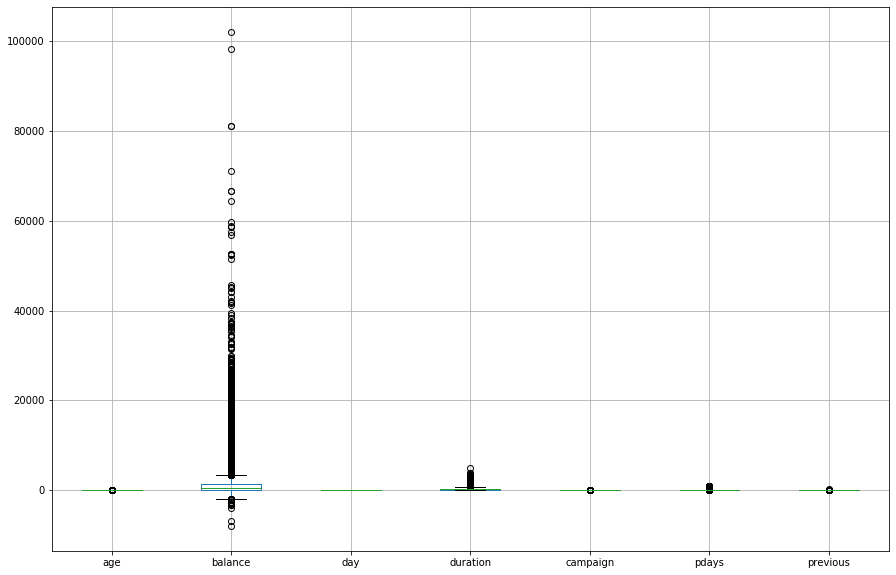

In [119]:
boxplot = bank_data_df.boxplot(grid = True, figsize = (15, 10))

We have 7 numerical attributes so we are going to examine only those.

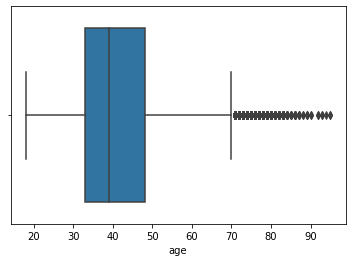

In [120]:
ax = sns.boxplot(x = bank_data_df["age"])

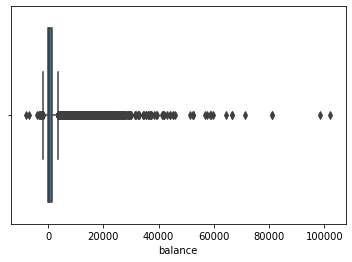

In [121]:
ax = sns.boxplot(x = bank_data_df["balance"])

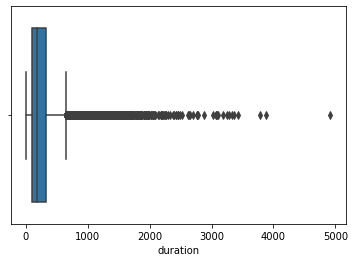

In [122]:
ax = sns.boxplot(x = bank_data_df["duration"])

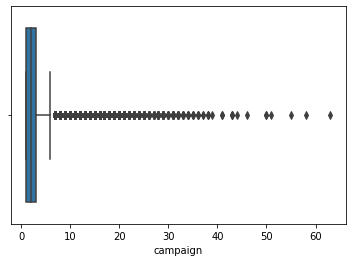

In [123]:
ax = sns.boxplot(x = bank_data_df["campaign"])

We can point out that the attributes age, balance, duration and campaign have the most outliers in the dataset.

# Data Preprocessing

Convert the column 'y' from categorical to numeric because it will help me in the future.
1 is 'yes and 0 is 'no'

In [124]:
bank_data_df['y'].replace(['yes', 'no'], [1, 0], inplace = True)
bank_data_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


For the missing values we are going to use 2 techniques. When the most frequent word has by far more data points we, are going to replace the missing values with the most frequent one. Otherwise we are going to replace the missing values with a random value.

In [125]:
bank_data_df["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [126]:
bank_data_df["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [127]:
bank_data_df["contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [128]:
bank_data_df["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

Based on the above, for the job attribute we are going to use the second technique and the first technique for the other attributes.

In [129]:
collumn_names_missing_values_list = ["education", "contact", "poutcome"]

# A function that for every attribute, it replaces every unknown value with the most frequent one. 
def replace_missing_values(collumn_name):
    result_a = bank_data_df[collumn_name].value_counts()
    most_frequent_value = result_a.index[0]
    bank_data_df[collumn_name].replace("unknown", most_frequent_value, inplace = True)

for current_collumn_name in collumn_names_missing_values_list:
    replace_missing_values(current_collumn_name)


In [130]:
bank_data_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


We can observe that the attribute poutcome, still has unknown values. The reason is that the most frequent values in this attribute is the value unknown, so we are going to replace it with the second most frequent value whis is failure.

In [131]:
second_most_frequent_value = bank_data_df["poutcome"].value_counts().index[1]
bank_data_df["poutcome"].replace("unknown", second_most_frequent_value, inplace = True)
bank_data_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,0
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,failure,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,failure,0
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,failure,0
4,33,unknown,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,failure,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,failure,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,failure,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,failure,0


Replace the unknown values of attribute "job" with a random value.

In [132]:
job_attribute_unique_values_list = bank_data_df['job'].unique().tolist()
job_attribute_unique_values_list

['management',
 'technician',
 'entrepreneur',
 'blue-collar',
 'unknown',
 'retired',
 'admin.',
 'services',
 'self-employed',
 'unemployed',
 'housemaid',
 'student']

In [133]:
random_value = random.choice(job_attribute_unique_values_list)
random_value

'self-employed'

In [134]:
bank_data_df["job"].replace("unknown", random_value, inplace = True)
bank_data_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,0
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,failure,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,failure,0
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,failure,0
4,33,self-employed,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,failure,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,failure,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,failure,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,failure,0
